# Task 1 : Data Science & Business Analytics 
    
    To predict the percentage of marks of the students based on the number of       hours they studied
   
Author: Khushi Nigam
    

In [2]:
import numpy as np  #numpy for mathematical operations
import pandas as pd #panda library for data manipulation and data analysis
import matplotlib.pyplot as plt #used for data visualization
from sklearn.model_selection import train_test_split #to split datasets into training and testing sets
from sklearn.linear_model import LinearRegression #to implement  linear regression model
from sklearn.metrics import mean_absolute_error #to calculate the mean absolute error (MAE)
%matplotlib inline

In [26]:
data_url = "score.csv"
data=pd.read_csv(data_url)
data.head(25) # use to read first 5 lines of data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


To check if data is null

In [14]:
data.isnull == True




False

To check dataset shape ie. rows and columns

In [15]:
data.shape

(25, 2)

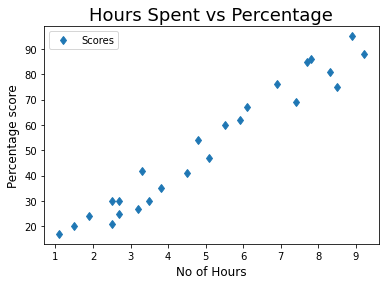

In [10]:
data.plot(x='Hours', y='Scores', style='d') 
plt.title("Hours Spent vs Percentage",size=18)
plt.xlabel("No of Hours",size=12)
plt.ylabel("Percentage score",size=12)
plt.show()

# Training the Model

 Splitting The Data

In [35]:
X = data.iloc[:, :-1].values  #select all rows & columns and convert it into a numpy array
Y = data.iloc[:, 1].values #selects dependent variables and convert it into a numpy array
# Splitting Data Into Training and Validation set
train_X, val_X, train_Y, val_Y = train_test_split(X, Y, random_state = 0)

Fitting Into Linear Regression Model

In [36]:
regression = LinearRegression() #Initializing the Linear Regression Model
regression.fit(train_X, train_y)
print("Model Trained Successfully")

Model Trained Successfully


In [37]:
prediction_Y=regression.predict(val_X)
predicted=pd.DataFrame({'Hours': [i[0] for i in val_X], 
                      'Predicted Marks': [k for k in prediction_Y]})

# Comparing the Predicted Marks


In [38]:
compare_scores = pd.DataFrame({'Actual Marks': val_Y, 'Predicted Marks': prediction_Y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# Visually Comparing the Model Prediction with the Actual Values

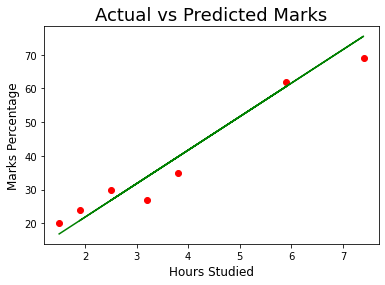

In [39]:
plt.scatter(x=val_X, y=val_Y, color='red')
plt.plot(val_X, prediction_Y, color='Green')
plt.title('Actual vs Predicted Marks', size=18)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

# Evaluating the Model


In [40]:
print('Mean Absolute Error: ',mean_absolute_error(val_Y,prediction_Y))

Mean Absolute Error:  4.130879918502486


Since very small value of Mean Absolute Error has been obtained, thus chances of error or wrong prediction by the model are very less.

What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [41]:
hours=[9.25]
predicted_score=regression.predict([hours])
print("Predicted Score is",predicted_score )

Predicted Score is [93.89272889]


In [43]:
round(predicted_score[0],2)

93.89

According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.